# Notion

This notebook is the modified notebook of [AtomisticSimulationTutorial](https://docs.matlantis.com/atomistic-simulation-tutorial/en/) to run on Google Colab. We only provide executable parts with general library.

# Opt

In this chapter, we will learn about **structural optimization** (also called structural relaxation, structure optimization or structure relaxation), which calculates the local stability coordinates of a system and its energy.

There are two types of optimization algorithms: global optimization and local optimization. We focus our attention on local optimization methods for structural optimization in this chapter.

<figure>
    <img src="https://github.com/matlantis-pfcc/atomistic-simulation-tutorial-colab/blob/main/tutorials/assets/ch2/local-global-minimum.en.png?raw=1" width="720px">
    <figcaption>The horizontal axis represents the various conformations of the system, and the vertical axis represents the energy.</figcaption>
</figure>

The coordinates of a system consisting of N atoms have $3*N$ dimensions of freedom, for example, a system consisting of 100 atoms is an optimization problem in a high-dimensional space of 300 dimensions. <br/>
Finding a globally optimal solution is generally a difficult problem.

Structural optimization finds the system's stable structure by determining the system's initial coordinates and finding local stable points from there. <br/>
Even when the composition of a substance (combination of elements and their proportions, e.g., NaCl) is known, it is not apparent what its structure is.
Determining the stable structure is essential because many properties of a substance are determined from its state near its stable structure.

The following analytical and measuring instruments may be used to determine the structure experimentally.

However, even in that case

 - Only partial information on the material can be obtained from the spectral information, and information on the 3D structure cannot be directly observed (1~6)
 - It is necessary to prepare structures such as single crystals or thin films, and it is sometimes difficult to prepare such samples in reality (3, 8)
 - Lack of resolution for atomic scale observation (7)
 - Although the shape of the surface can be observed, it is not possible to distinguish the type of atoms and molecules (9)

It is not easy to determine how each atom is arranged in the material we are dealing with and to identify the three-dimensional structure of the material.

Examples of analytical instruments:

| Name | Description |
|:---|:---|
|1. Infrared spectroscopy |Obtain information on molecular structure by measuring infrared absorption due to molecular vibrations. |
|2. Raman spectroscopy |Raman scattering light is used to evaluate materials. |
|3. XRD: X-ray Diffraction |Identification and quantification of substances by analyzing diffraction obtained by a beam of incident X-rays to crystal structures. |
|4. XPS: X-ray Photoelectron Spectroscopy |X-rays are irradiated to a material, and the photoelectrons e- emitted as a result of ionization of the material are measured for energy analysis. |
|5. MS: Mass Spectroscopy |Accurately measures the mass of individual compounds that make up a substance. |
|6. NMR: Nuclear Magnetic Resonance | Analyze organic compounds using the phenomenon of nuclear resonance. |
|7. SEM: Scanning Electron Microscope | Observation of surfaces with a resolution of 0.4~4nm using electron beams with short wavelengths. |
|8. TEM: Transmission Electron Microscope | Observation of microscopic substances by the intensity of the electron beam transmitted through the object. |
|9. AFM: Atomic Force Microscope | Microscope to detect the atomic forces acting between the tip and the sample. |

Therefore, it is vital to estimate which structure is likely to be in the simulation and verify it in the experiment (or vice versa).

## Initial setup

In [ ]:
!pip install ase==3.23.0

In [ ]:
import os

from IPython.display import HTML, Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation

from ase import Atoms
from ase.build import make_supercell
from ase.io import write
from ase.visualize import view

os.makedirs("output", exist_ok=True)

def view_x3d(atoms, idx=0):
    if isinstance(atoms[0], Atoms):
        # Assume this is a trajectory or struct list
        if (len(atoms) <= idx):
                print(f"The specified index exceeds the length of the trajectory. The length of the trajectory is {len(atoms)}.")
        return view(atoms[idx], viewer="x3d")
    else:
        return view(atoms, viewer="x3d")


def view_ase_atoms(atoms, rotation="0x,0y,0z", figsize=(4, 4), title="", scale=100):
    fig, ax = plt.subplots(figsize=figsize)
    write("output/tmp.png", atoms, rotation=rotation, scale=scale)
    img = mpimg.imread('output/tmp.png')
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')
    plt.show()
    os.remove('output/tmp.png')
    return

def traj_to_apng(traj, rotation='30x,30y,30z'):
    imgs = []
    for atom in traj:
        supercell = make_supercell(atom, [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        write('output/tmp.png', supercell, rotation=rotation, show_unit_cell=2)
        img = mpimg.imread('output/tmp.png')
        imgs.append(img)
    os.remove('output/tmp.png')

    fig, ax = plt.subplots()

    def update(frame):
        img = imgs[frame]
        ax.clear()
        ax.imshow(img)
        return []

    ani = FuncAnimation(fig, update, frames=len(imgs), blit=True)
    plt.close()
    return HTML(ani.to_jshtml())

In [ ]:
# this command takes several minutes

## install mopac
# 環境変数を設定して非対話モードに
!export DEBIAN_FRONTEND=noninteractive

# 必要なパッケージのインストール（-yフラグで自動承認）
!apt-get update -y
!apt-get install -y build-essential gfortran cmake libopenblas-dev

# 古いビルドディレクトリがある場合は削除
!rm -rf build

# GitHubからMOPACをクローン
!git clone https://github.com/openmopac/mopac.git

# ビルドディレクトリの作成
%cd /content/mopac
!mkdir build
%cd build

# CMakeを非対話モードで実行
!cmake -DCMAKE_BUILD_TYPE=Release ..

# ビルドの実行（-jフラグで並列ビルド）
!make -j$(nproc)

# インストール
!make install

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
%cd /content

/content


## Opt molecules

First, let us try to optimize the structure of a single organic molecule without periodic boundary conditions as a simple example.


### 1. Hydrogen molecule

First, we will use structural optimization to find the bond length for the most stable structure of the hydrogen molecule,
which we did in the previous chapter.

The flow will be as follows

 - Step 1: Prepare a calculator to calculate potential energy.
 - Step 2: Prepare molecules for structural optimization.
 - Step 3: Select a method for the structural optimization algorithm and run it.

Step 1: Prepare calculator

In [ ]:
from ase.calculators.emt import EMT

calculator = EMT()

Step 2: Prepare molecules for structural optimization

Here we create a hydrogen molecule. We will manually set the initial coordinates at a distance of 1.0A.

In [ ]:
from ase import Atoms

atoms = Atoms("H2", [[0, 0, 0], [0, 0, 1.0]])
atoms.calc = calculator

Step 3: Select and run the structural optimization algorithm method

As local optimization algorithms, ASE offers the `FIRE` and `MDMin` methods which perform optimization with gradient descent-like behavior, and the `BFGS`, `LBFGS`, `BFGSLineSearch`=`QuasiNewton`, `LBFGSLineSearch` methods which perform optimization by considering second derivertive are provided.
The differences and properties of these algorithms are explained in the later section.

 - https://wiki.fysik.dtu.dk/ase/ase/optimize.html

This time, we will use `LBFGS` to perform structural optimization. <br/>
We will set `atoms` to the local optimization algorithm and call the `run` method to perform structural optimization. <br/>
If you specify the `trajectory` argument, you can save the structural optimization process.

In [ ]:
import os
from ase.optimize import LBFGS, BFGS, FIRE

os.makedirs("output", exist_ok=True)

opt = LBFGS(atoms, trajectory="output/bfgs_h2.traj")
opt.run(fmax=0.01)

       Step     Time          Energy          fmax
LBFGS:    0 02:41:01        2.299030        8.035807
LBFGS:    1 02:41:01        1.073973        0.803630
LBFGS:    2 02:41:01        1.077039        1.044666
LBFGS:    3 02:41:01        1.070550        0.038983
LBFGS:    4 02:41:01        1.070541        0.002004


True

In this simple example, the structural optimization was completed in 7 steps, and it took about 2 seconds in Matlantis.

Let's visualize the process of structural optimization.

In [ ]:
from ase.io import Trajectory

traj = Trajectory("output/bfgs_h2.traj")
view_x3d(traj)

Plot how the atomic distances have changed during structural optimization.

In [ ]:
import numpy as np

# np.linalg.norm?
distance_list = []
E_pot_list = []
for atoms in traj:
    p1, p2 = atoms.get_positions()
    distance = np.linalg.norm(p1 - p2)
    distance_list.append(distance)
    E_pot_list.append(atoms.get_potential_energy())

print("Distance trajectory", distance_list)

Distance trajectory [1.0, 0.7704055255375273, 0.7912789110251786, 0.7794811681635996, 0.7790238514009783]


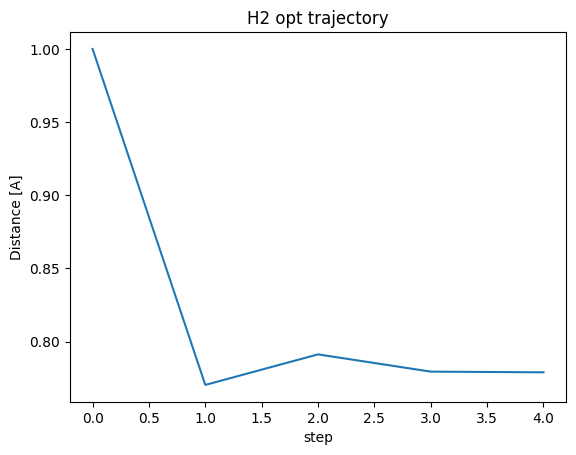

In [ ]:
import matplotlib.pyplot as plt
plt.plot(distance_list)
plt.xlabel("step")
plt.ylabel("Distance [A]")
plt.title("H2 opt trajectory")
plt.show()

In [ ]:
atoms.get_distance(0,1)

0.7790238514009783

Finally, it settled around `0.78` A.

In the previous chapter, we calculated the energies for all bond distances and found the lowest energy value, but we can efficiently find a stable structure by using structural optimization.

### 2. Cyclohexane

As a next example, consider the stable structure of cyclohexane.

Cyclohexane has the structure C6H12, but is known to take several conformations. <br/>
Typical conformational isomers include chair (A), twist-boat (B), boat (C), and half-chair (D), as shown in the figure below.

The chair conformation is the most stable (lowest energy); at 25°C, 99.99% of all molecules in cyclohexane solution are in this conformation. <br/>
In this section, we will prepare the initial structures of the chair shape (A) and the boat shape (C), perform structural optimization, and compare their shapes and potential energies.

<figure style="width:600px">
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Cyclohexane_ring_flip_and_relative_conformation_energies.svg"/>
</figure>

<cite>Cite from [cyclohexane conformation](https://en.wikipedia.org/wiki/Cyclohexane_conformation)</cite>

**Prepare initial coordinate structure**

The chair shape is prepared from the structure published in PubChem.

3D structure image of CID 8078 Cyclohexane (Compound)

PubChem Identifier: CID 8078<br/>
URL: https://pubchem.ncbi.nlm.nih.gov/compound/8078#section=3D-Conformer


In [ ]:
from ase.data.pubchem import pubchem_atoms_search

chair_atoms = pubchem_atoms_search(smiles="C1CCCCC1")
view_x3d(chair_atoms)

In this tutorial, let's generate the boat shape by manually changing the coordinate values from the chair shape.

You can skip understanding the code even if you don't know what it does. (We create atoms rotated 180 degrees, and only atoms 2, 10, and 11 are overwritten with the rotated coordinates.)

In [ ]:
boat_atoms = chair_atoms.copy()
axis = boat_atoms.positions[[1, 5]].mean(axis=0) - boat_atoms.positions[[0, 4]].mean(axis=0)
boat_atoms.rotate(180, axis)
# inds = [1, 3, 5, 8, 9, 12, 13, 16, 17]
inds = [2, 10, 11]
boat_atoms.positions[inds] = chair_atoms.positions[inds]

In [ ]:
view_x3d(boat_atoms)

In [ ]:
from ase.calculators.mopac import MOPAC

In [ ]:
calculator = MOPAC(label='ch-chair',  # 出力ファイルのベース名
                   method='PM7',  # 使用するMOPACのキーワード
                   task='1SCF GRADIENTS')  # 実行するタスク

chair_atoms.calc = calculator
opt = LBFGS(chair_atoms, trajectory="output/lbfgs_cyclohexane_chair.traj")
opt.run()

       Step     Time          Energy          fmax
LBFGS:    0 02:41:03       -1.150365        0.309415
LBFGS:    1 02:41:03       -1.165427        0.228094
LBFGS:    2 02:41:03       -1.178933        0.089017
LBFGS:    3 02:41:04       -1.180112        0.083079
LBFGS:    4 02:41:04       -1.181583        0.064370
LBFGS:    5 02:41:04       -1.182878        0.073467
LBFGS:    6 02:41:04       -1.183974        0.060463
LBFGS:    7 02:41:04       -1.184364        0.031105


True

In [ ]:
calculator = MOPAC(label='ch-boat',  # 出力ファイルのベース名
                   method='PM7',  # 使用するMOPACのキーワード
                   task='1SCF GRADIENTS')  # 実行するタスク

boat_atoms.calc = calculator
opt = LBFGS(boat_atoms, trajectory="output/lbfgs_cyclohexane_boat.traj")
opt.run()

       Step     Time          Energy          fmax
LBFGS:    0 02:41:04        5.137694        6.378012
LBFGS:    1 02:41:04        3.513215        4.774263
LBFGS:    2 02:41:04        1.525382        2.677209
LBFGS:    3 02:41:05        0.695720        4.069893
LBFGS:    4 02:41:05        0.193902        3.330441
LBFGS:    5 02:41:05       -0.135080        2.197739
LBFGS:    6 02:41:05       -0.267527        2.068294
LBFGS:    7 02:41:05       -0.635942        0.807765
LBFGS:    8 02:41:05       -0.709424        0.575753
LBFGS:    9 02:41:05       -0.763875        0.495242
LBFGS:   10 02:41:05       -0.802269        0.504294
LBFGS:   11 02:41:05       -0.851803        0.426728
LBFGS:   12 02:41:06       -0.876820        0.351092
LBFGS:   13 02:41:06       -0.893220        0.331347
LBFGS:   14 02:41:06       -0.904347        0.270903
LBFGS:   15 02:41:06       -0.913095        0.241499
LBFGS:   16 02:41:06       -0.918015        0.169009
LBFGS:   17 02:41:06       -0.921146        0.21

True

Visualize and check the structure after structural optimization.

In [ ]:
view_x3d(chair_atoms)

In [ ]:
view_x3d(boat_atoms)

Also, compare the energy difference between them.

The unit of energy is eV, but you can use the `units` module to convert units.

 - https://wiki.fysik.dtu.dk/ase/ase/units.html

In [ ]:
from ase.units import Bohr,Rydberg,kJ,kB,fs,Hartree,mol,kcal

E_chair = chair_atoms.get_potential_energy()
E_boat = boat_atoms.get_potential_energy()

E_diff = E_boat - E_chair

print(f"E_chair {E_chair:.2f} eV")
print(f"E_boat  {E_boat:.2f} eV")
print(f"E_diff  {E_diff:.2f} eV = {E_diff / (kJ/mol):.2f} kJ/mol")

E_chair -1.18 eV
E_boat  -1.02 eV
E_diff  0.17 eV = 16.12 kJ/mol


The chair shape was found to be lower energy and more stable than the boat shape. <br/>
The energy difference was also close to the 25 kJ/mol value shown in the figure above.

Thus, in structural optimization, the initial structure is important to find the local stability point. <br/>
Even for the same cyclohexane, the results after structural optimization will differ depending on how the initial structure is prepared.

### 2. Lattice constant optimization of Cu crystal

Next, let's find this lattice constant efficiently by using a structural optimization algorithm.
When optimizing a bulk with a periodic structure, the method differs depending on whether we are optimizing only the atomic coordinates or **including the cell size**. <br/>
If you want to optimize the cell as well, you need to apply the following Filter class to the ASE atoms.

**Table: Optimization target and Filter to be used**

|  Position  | Cell | Filter |
| ---- | ---- | ---- |
|  ✓  |    | No filter (Default behavior) |
|    |  ✓  | `StrainFilter` |
|  ✓  |  ✓  | `ExpCellFilter` or `UnitCellFilter` |

1. Fix atomic coordinates, opt only cell --> `StrainFilter`
2. Fix cell, opt only atomic coordinates --> No Filter
3. Opt both atomic coordinates and cell  --> `ExpCellFilter`


Here is an example of using `StrainFilter`.

We will optimize the lattice constants of the BCC and FCC structures of Cu atoms. <br/>
Since the BCC and FCC structures contain only one atom in the primitive cell, optimizing the atomic coordinates is not necessary, and it is sufficient to optimize only the lattice constants.
So `StrainFilter` is appropriate.

In [ ]:
from ase.filters import StrainFilter
from ase.build import bulk
from ase.calculators.emt import EMT

cu_bcc_atoms = bulk("Cu", "bcc", a=3.0)
print("Before opt:", cu_bcc_atoms.cell)
cu_bcc_atoms.calc = EMT()

cu_bcc_atoms = StrainFilter(cu_bcc_atoms)
opt = LBFGS(cu_bcc_atoms, trajectory="output/lbfgs_cu_bcc.traj")
opt.run()

Before opt: Cell([[-1.5, 1.5, 1.5], [1.5, -1.5, 1.5], [1.5, 1.5, -1.5]])
       Step     Time          Energy          fmax
LBFGS:    0 02:41:12        0.119060        2.058740
LBFGS:    1 02:41:12        0.067118        1.429361
LBFGS:    2 02:41:12        0.028270        0.394816
LBFGS:    3 02:41:12        0.025685        0.051170
LBFGS:    4 02:41:12        0.025639        0.001519


True

In [ ]:
cu_fcc_atoms = bulk("Cu", "fcc", a=3.0)
print("Before opt:", cu_fcc_atoms.cell)
cu_fcc_atoms.calc = EMT()

cu_fcc_atoms = StrainFilter(cu_fcc_atoms)
opt = LBFGS(cu_fcc_atoms, trajectory="output/lbfgs_cu_fcc.traj")
opt.run()

Before opt: Cell([[0.0, 1.5, 1.5], [1.5, 0.0, 1.5], [1.5, 1.5, 0.0]])
       Step     Time          Energy          fmax
LBFGS:    0 02:41:12        1.998666       15.035556
LBFGS:    1 02:41:13        0.238493        4.341885
LBFGS:    2 02:41:13        0.032164        1.602629
LBFGS:    3 02:41:13       -0.005589        0.294031
LBFGS:    4 02:41:13       -0.007023        0.027962


True

In [ ]:
cu_bcc_atoms.atoms.cell

Cell([[-1.4277682077389566, 1.4277682077389569, 1.4277682077389566], [1.4277682077389566, -1.4277682077389569, 1.4277682077389566], [1.4277682077389566, 1.4277682077389569, -1.4277682077389566]])

In [ ]:
cu_fcc_atoms.atoms.cell

Cell([[9.599646914998983e-17, 1.7939198768932187, 1.793919876893219], [1.7939198768932187, 6.90071281845051e-17, 1.793919876893219], [1.7939198768932187, 1.7939198768932187, 8.141128784294879e-17]])

When optimizing the lattice constants using `StrainFilter`, the values of the a, b, and c axes are slightly different because of the lack of consideration for the symmetry of the crystal. <br/>
(In fact, it is possible to optimize while preserving the symmetry by using `ExpCellFilter` or `FixSymmetry` as described below.)

Here we will take the average value to calculate the final lattice constant. <br/>
For the argument `a` to the `bulk` method of ASE, the cells of the BCC structure are

```
[[-a/2, a/2, a/2],
 [a/2, -a/2, a/2],
 [a/2, a/2, -a/2]]
```

The cells of the FCC structure are

```
[[0, a/2, a/2],
 [a/2, 0, a/2],
 [a/2, a/2, 0]]
```

The following calculation is performed using this fact.

In [ ]:
a = np.abs(cu_bcc_atoms.atoms.cell).mean() * 2
E_pot = cu_bcc_atoms.get_potential_energy()
print(f"BCC opt: a = {a:.2f} A, E = {E_pot:.2f} eV")

a = cu_fcc_atoms.atoms.cell.sum() / 3
E_pot = cu_fcc_atoms.get_potential_energy()
print(f"FCC opt: a = {a:.2f} A, E = {E_pot:.2f} eV")

BCC opt: a = 2.86 A, E = 0.03 eV
FCC opt: a = 3.59 A, E = -0.01 eV


As a result of structural optimization, we found that the FCC structure has the minimum energy at `a=3.59` A.

We also found that **Cu is more stable in the FCC structure than in the BCC structure**, which is consistent with experimental results.

One caveat to using `StrainFilter` is that the a, b, and c axes of a cell are optimized independently, so even if you want to keep that ratio, it may not be preserved.

**[Note] Structural optimization is required every time Calculator (potential energy) changes**

You might think that the structure of the Materials project is already a perfectly stable structure, since it is also a structure that has undergone structural optimization.
However, the exact local point (the structure that takes the lowest energy) is different when the potential energy changes.

## [Column] Structural optimization and the real world

The structural optimization calculations presented in this chapter are the foundation for almost all the atomistic simulations introduced later. However, the computational methods used inside the structural optimization are somewhat technical, and those new to atomistic simulations through this tutorial may not intuitively understand the necessity of such calculations. Therefore, in this column, we will review structural optimization calculations from the viewpoint of their correspondence with the real world.

### Need for structural optimization

Considering how the atomic arrangement of material in the real world is determined, each atom is free to move around without any particular constraints, so excess energy is dissipated and transformed into a stable structure with low energy.
Once we consider the case where the temperature is sufficiently low, ignoring the effect of temperature, in that case, the kinetic energy of the atoms will be zero, and the potential energy will be minimal.
In this sense, structural optimization calculations correspond to absolute zero temperature conditions in the real world.

What about the case of finite temperature?
From the theory of statistical mechanics, it is known that temperature and kinetic energy have a constant relationship in a system in equilibrium. A rough calculation shows that a 1 K rise corresponds roughly to a 1/10000 eV/atom increase in kinetic energy.
Conversely, an increase in energy of 1 eV/atom corresponds to a structure of about 10000 K in terms of temperature.
Thus, even at finite temperatures, an energy-optimized structure is often a good enough approximation, so it is common practice to start the simulation with a structural optimization calculation (and then increase the temperature for finite temperatures).

Simulations without structural optimization may lead to unrealistic results due to differences in assumptions.
For example, if the cell size of the iron crystal structure is reduced by 1%, you may not notice any particular change if you only visualize the atomic structure.
However, as can be seen by considering the operation of shrinking iron by 1% in the real world, this corresponds to iron under high compressive force (specifically, pressure in excess of 1 GPa), which can change the results of the simulation.

### Structural optimization methods and real world structural relaxation

Let us consider why there are several structural optimization methods by their correspondence to the real world. What happens when the material at an appropriately high temperature, like molten iron, is cooled slightly by removing heat? The iron atoms constantly vibrate due to the heat, taking on various atomic configurations and gradually transitioning to a structure with lower potential energy. Eventually, they transition to a crystal structure with low energy, a well-ordered atomic arrangement. In this sense, structural optimization in the real world is considered [simulated annealing](https://en.wikipedia.org/wiki/Simulated_annealing)).
(Historically, this corresponds to the original idea of annealing.)

In simulated annealing, atoms are in motion for a long time at an elevated temperature. It means that, in principle, an atomistic simulation can yield the same stable structure as in the real world if a sufficiently long molecular dynamics calculation can be performed.

The problem here, however, is the gap between the time scale of the MD simulation and reality.
While atomic motion is typically a femtosecond ($10^{-15}$ s) order phenomenon, much longer time scales typically come into play when considering real-world materials.
Therefore, real-world structures can be viewed as the result of extremely long-time structural optimization calculations on the scale of $10^{15}$ or even longer atomic scale simulations.
It is also known that the annealing method is a highly robust optimization technique and can arrive at a more globally optimal solution by taking a sufficiently long time.
Therefore, it is possible to consider that a material that exists, in reality, has obtained an atomic structure for which the global optimization problem has been virtually solved.

Thus, methods that allow atomistic simulations to find more globally optimal solutions in a shorter time have been developed. This is generally a tradeoff against computational time and is used in different cases. Suppose the structure of interest is already known, such as a crystalline structure, and a sufficiently close structure can be taken as the initial structure. In that case, the BFGS-like method shown in the example above is the preferred method for finding the local optimum. Conversely, when the target structure is unknown, such as an amorphous structure, more attention is paid to finding a more globally optimal solution. (For more realistic results, melt-quench methods are used, for example, in which the temperature is slowly lowered.) This is why libraries of atomic simulations, including ASE, include a variety of optimal solution methods.
As a side note, there are cases in the real world where the solution is not globally optimal. For example, diamond, a high-pressure phase of carbon, is not stable on earth, and graphite is the most stable allotrope. Because of the high energy required for structural change, the rate of structural change is extremely slow and is treated as a practically stable structure ([metastable state](https://en.wikipedia.org/wiki/Metastability)) on the human time scale.

A famous example of active use in manufacturing is the quenching of iron. The technique of hardening heated iron by immersing it in water is well known in the forging of Japanese swords. The time required for structural relaxation is limited by rapidly quenching the temperature, and the transition to a stable structure is prevented. This treatment yields a metastable state with a more desirable strength.

Thus, phenomena involving phase transformations and chemical changes often occur slowly, even on an everyday scale. This is true for atomistic simulations as well, and if one wants to look at phase transformations or chemical reactions, a more efficient computational approach may be used than simply performing long kinetic calculations. One specific example is the NEB method described in chapter 5.